In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [198]:
df= pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")
sp= pd.read_csv("/content/drive/MyDrive/Test_Data.csv")

In [199]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [200]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [201]:
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [202]:
df["CarName"]=df["CarName"].apply(lambda x:str(x).split(" ")[0].lower())
df["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [203]:
df["CarName"].replace({"maxda":"mazda", "porcshce":"porsche", "toyouta":"toyota", "vokswagen":"volkswagen","vw":"volkswagen"}, inplace=True)
df["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [204]:
df.drop('symboling',axis=1,inplace=True)
df.drop('car_ID',axis=1,inplace=True)

In [205]:
df.dtypes

CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [206]:
cat=df.select_dtypes(include="object").columns.tolist()
num=df.select_dtypes(exclude="object").columns.tolist()
cat


['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [207]:
num

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

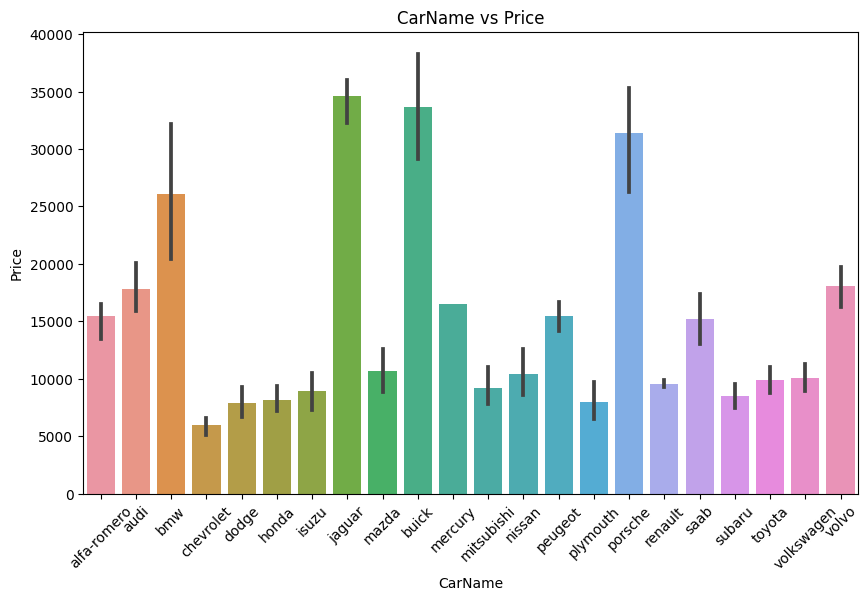

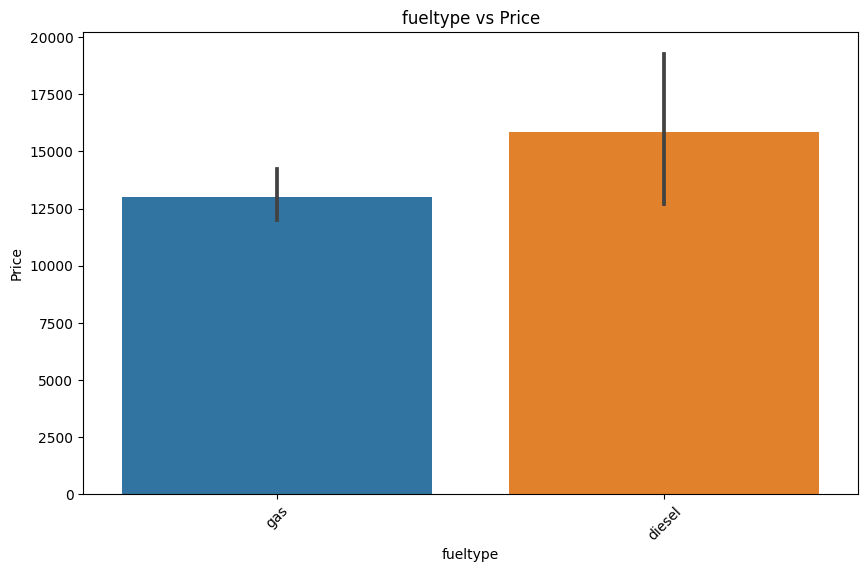

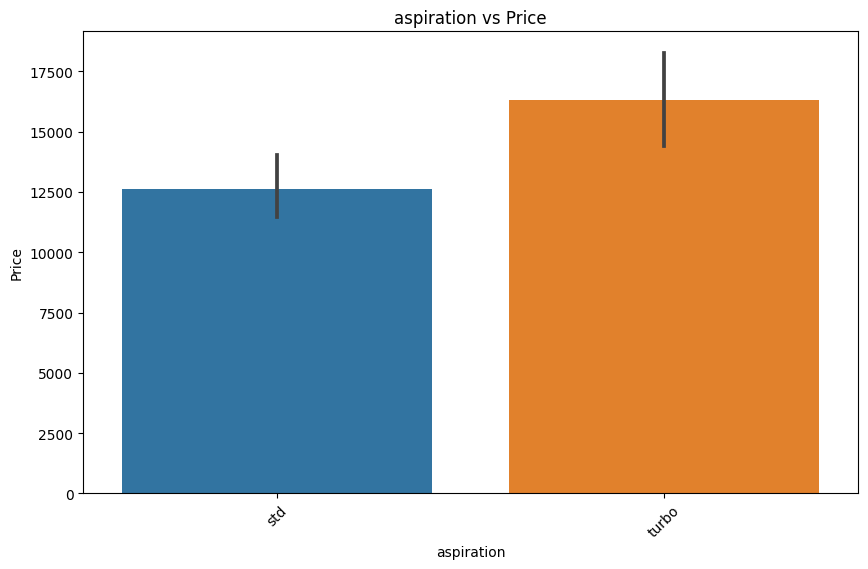

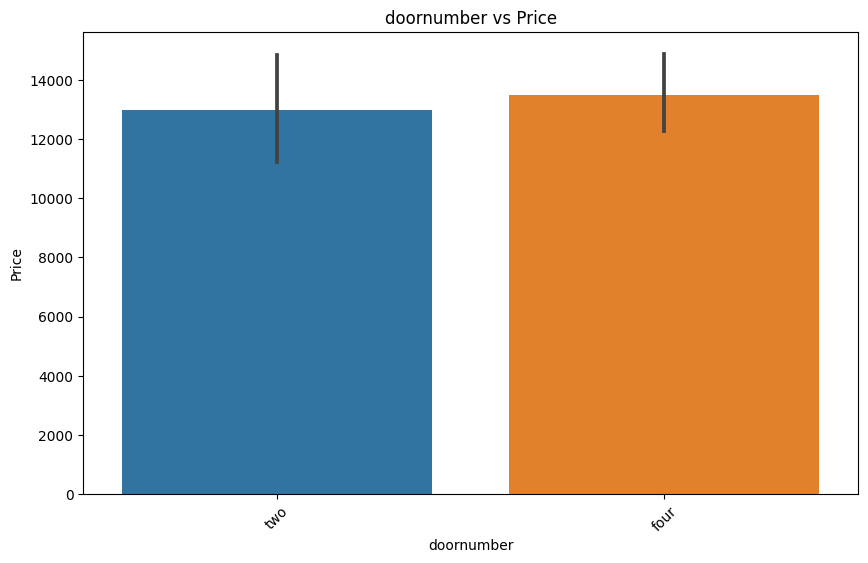

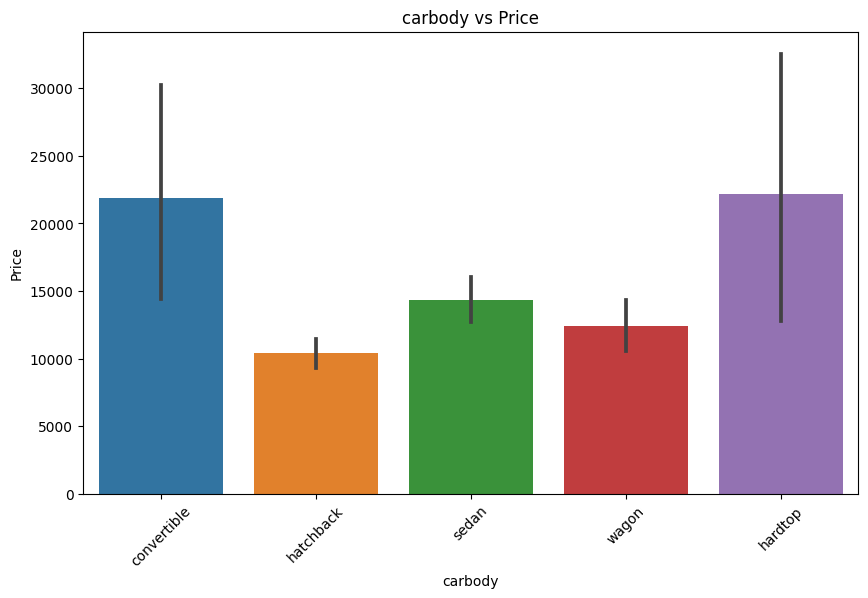

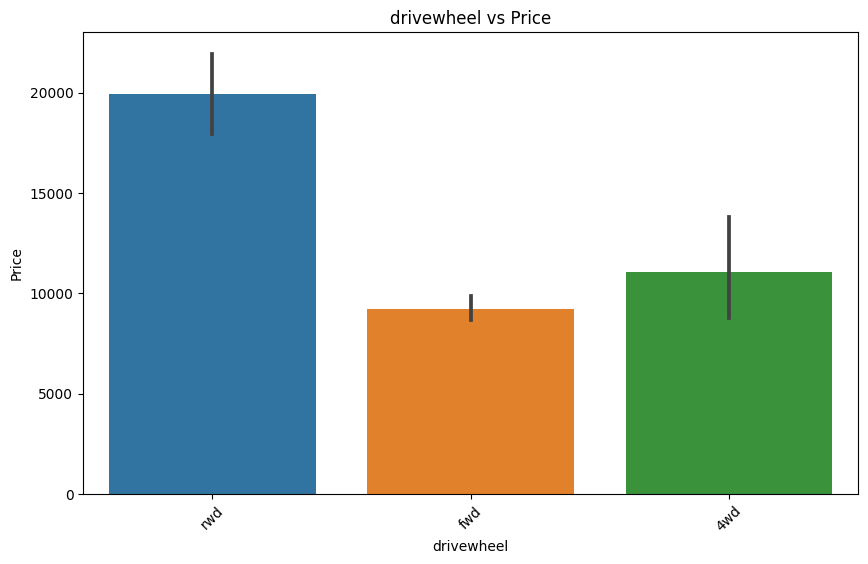

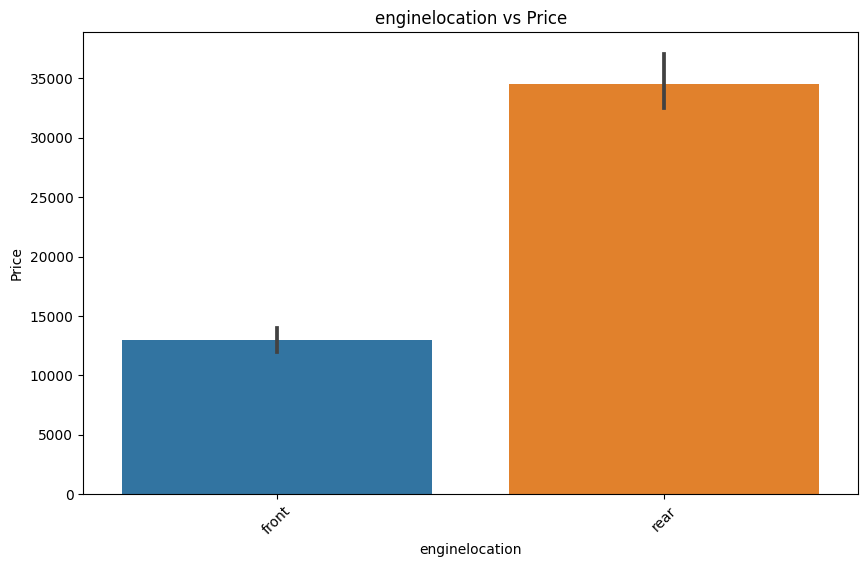

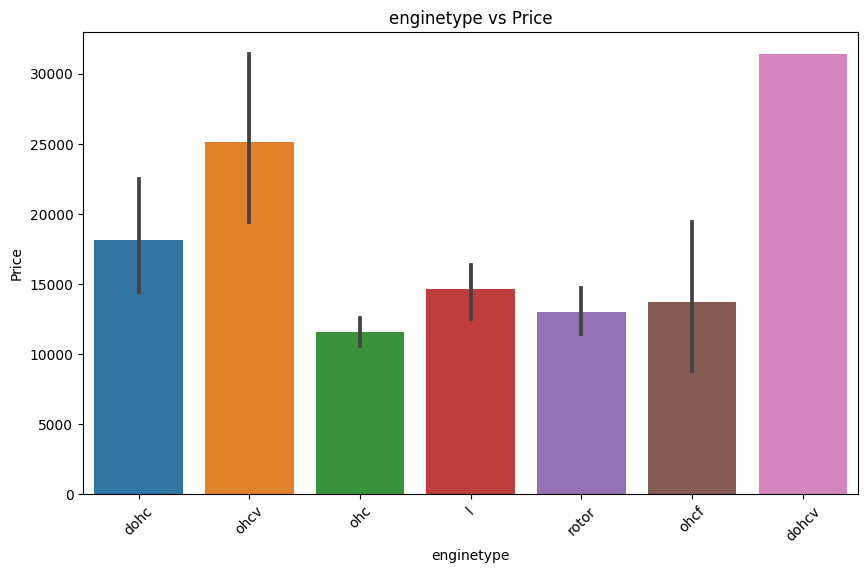

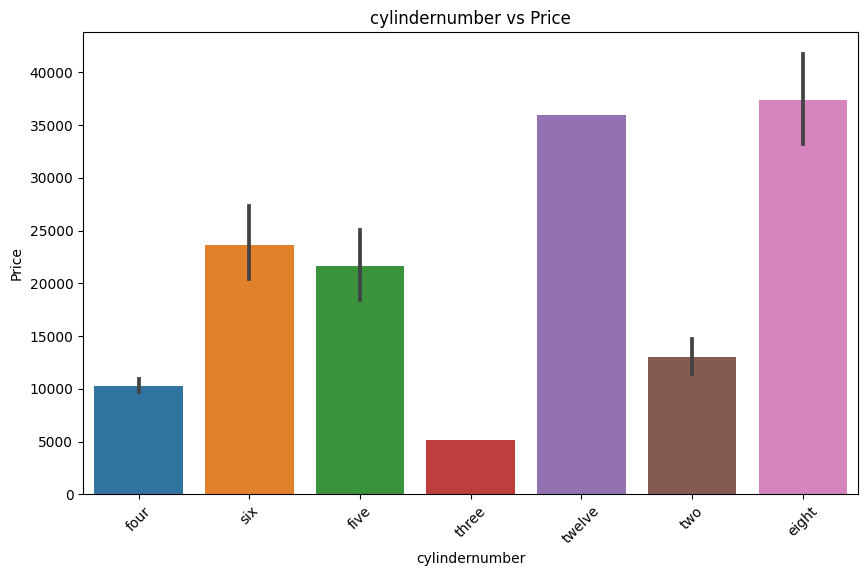

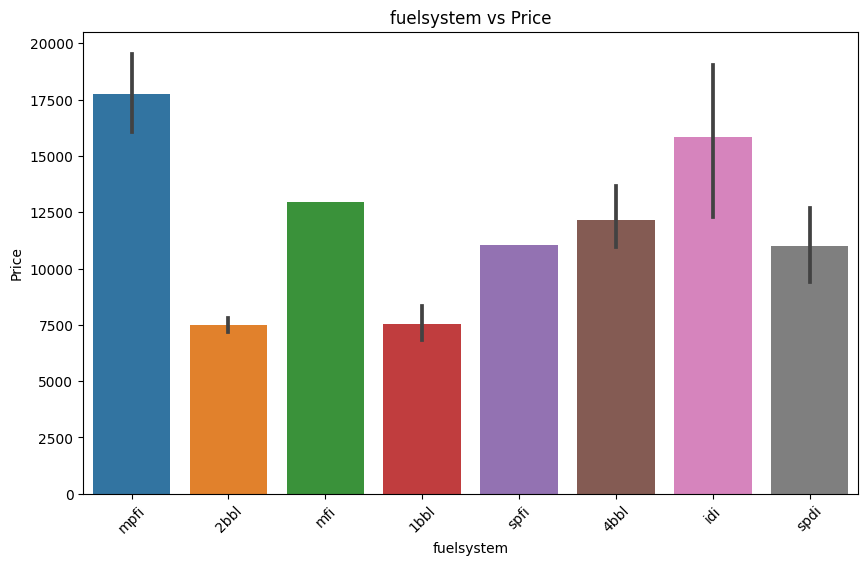

In [208]:
for col in cat:
    plt.figure(figsize=(10,6))
    sns.barplot(x=col,y='price',data=df)
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

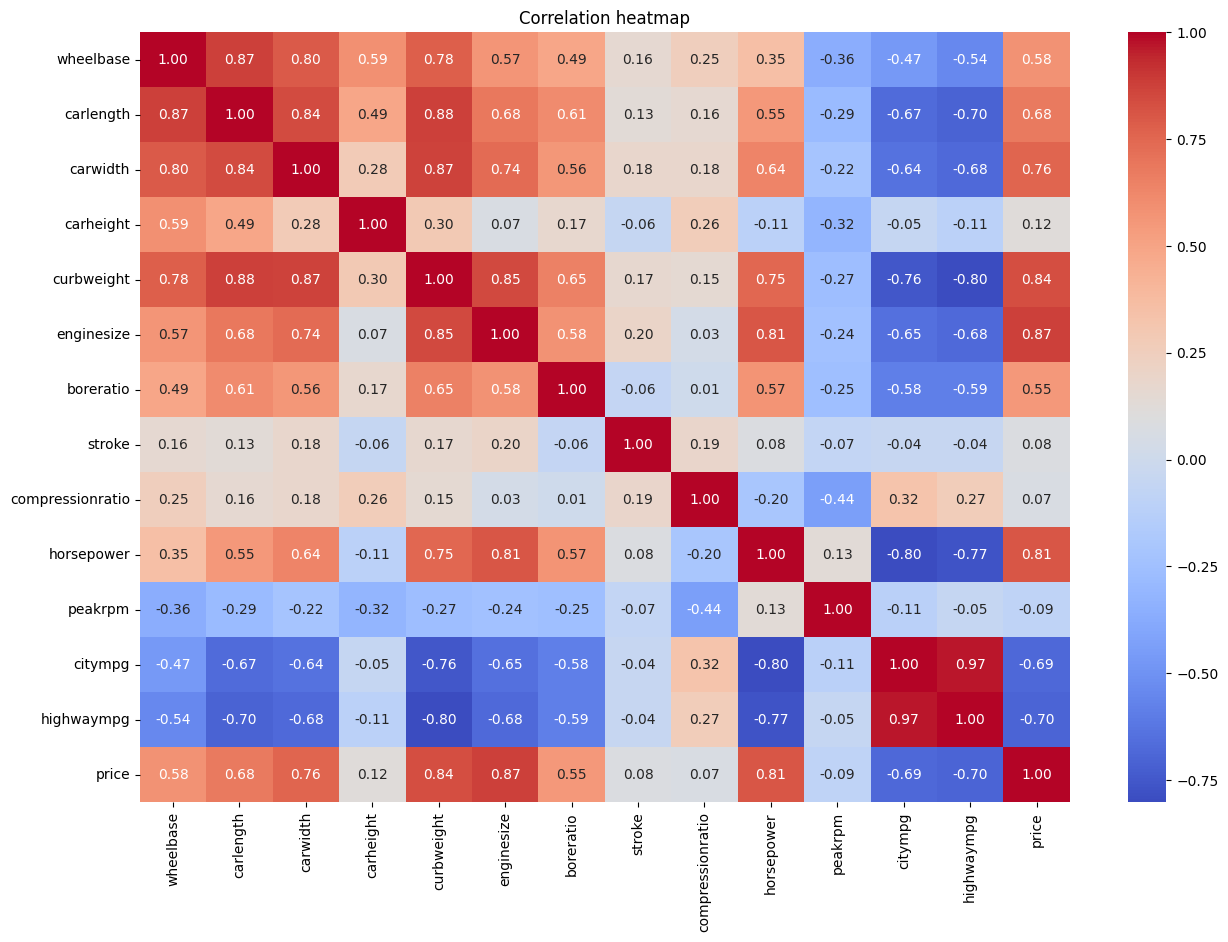

In [209]:
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

In [210]:
le=LabelEncoder()
for i in cat:
  df[i]=le.fit_transform(df[i])
df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,0,3,2,0,109.1,188.8,68.9,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,21,1,1,0,3,2,0,109.1,188.8,68.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,21,1,0,0,3,2,0,109.1,188.8,68.9,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,21,0,1,0,3,2,0,109.1,188.8,68.9,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [211]:
x=df.iloc[0:205,0:23]
y=df["price"]

In [212]:
x

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,0,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,0,1,0,1,2,2,0,94.5,171.2,65.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,1,1,0,0,3,1,0,99.8,176.6,66.2,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,1,1,0,0,3,0,0,99.4,176.6,66.4,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,0,3,2,0,109.1,188.8,68.9,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,21,1,1,0,3,2,0,109.1,188.8,68.8,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,21,1,0,0,3,2,0,109.1,188.8,68.9,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,21,0,1,0,3,2,0,109.1,188.8,68.9,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [213]:
y=y.round(-1)
y

0      13500.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16840.0
201    19040.0
202    21480.0
203    22470.0
204    22620.0
Name: price, Length: 205, dtype: float64

In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [215]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [216]:
y_pred=model.predict(x_test)
y_pred=y_pred.round(-1)


In [217]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [218]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error: 10641909.62
R-squared: 0.84
Mean Absolute Error (MAE): 2125.96


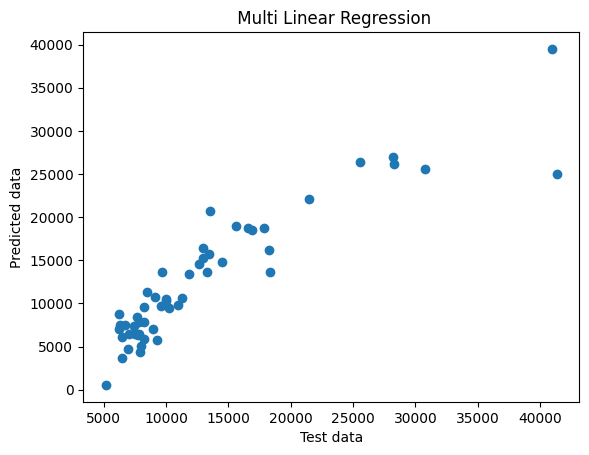

In [219]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.title(" Multi Linear Regression")
plt.xlabel("Test data")
plt.ylabel("Predicted data")
plt.show()

In [220]:
sp

,index,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,0,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16000
1,1,0,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,23,27,15500
2,2,0,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5400,24,31,20000
3,3,1,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5000,21,27,13200
4,4,1,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,23,32,16800
5,5,1,1,0,1,3,1,0,99.8,177.3,...,136,5,3.19,3.40,8.5,110,5000,24,27,14100
6,6,1,1,0,0,3,1,0,105.8,192.7,...,136,5,3.19,3.40,8.5,110,5400,19,26,20000
7,7,1,1,0,0,4,1,0,105.8,192.7,...,136,5,3.19,3.40,8.5,110,5000,18,27,20000
8,8,1,1,1,0,3,1,0,105.8,192.7,...,131,5,3.13,3.40,8.3,140,5000,21,27,22000
9,9,1,1,1,1,2,0,0,99.5,178.2,...,131,5,3.13,3.40,7.0,160,5000,21,27,17500


In [221]:
x1=sp.iloc[:,1:24]
x1

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,0,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,23,27
2,0,1,0,1,2,2,0,94.5,171.2,65.5,...,3,152,5,2.68,3.47,9.0,154,5400,24,31
3,1,1,0,0,3,1,0,99.8,176.6,66.2,...,2,109,5,3.19,3.40,10.0,102,5000,21,27
4,1,1,0,0,3,0,0,99.4,176.6,66.4,...,1,136,5,3.19,3.40,8.0,115,5500,23,32
5,1,1,0,1,3,1,0,99.8,177.3,66.3,...,1,136,5,3.19,3.40,8.5,110,5000,24,27
6,1,1,0,0,3,1,0,105.8,192.7,71.4,...,1,136,5,3.19,3.40,8.5,110,5400,19,26
7,1,1,0,0,4,1,0,105.8,192.7,71.4,...,1,136,5,3.19,3.40,8.5,110,5000,18,27
8,1,1,1,0,3,1,0,105.8,192.7,71.4,...,1,131,5,3.13,3.40,8.3,140,5000,21,27
9,1,1,1,1,2,0,0,99.5,178.2,67.9,...,1,131,5,3.13,3.40,7.0,160,5000,21,27


In [222]:
y1=sp["price"]
y1

0     16000
1     15500
2     20000
3     13200
4     16800
5     14100
6     20000
7     20000
8     22000
9     17500
10    13500
11    13500
12    19000
13    20000
14    22000
15    27000
16    27000
17    30000
18    10000
19    10000
Name: price, dtype: int64

In [223]:
Y_pred=model.predict(x1)
Y_pred

array([16162.2941704 , 15934.35216288, 18929.16947538, 14141.71350028,
       16412.97337854, 13894.63191103, 21290.69936981, 19974.63181731,
       22564.01541199, 17728.98815973, 12377.69846947, 13336.96235222,
       17674.58370918, 19411.34093452, 21355.60811753, 24457.98072852,
       24335.44213189, 28700.10473463,  2157.21176987,  7756.50629439])

In [224]:
m1=RandomForestRegressor()
m1.fit(x_train,y_train)

RandomForestRegressor()

In [225]:
y_pred1=m1.predict(x_test)
y_pred1=y_pred1.round(-1)
y_pred

array([25590., 18710.,  9690., 13430., 26150.,  6490.,  7900.,  5810.,
        9470.,  6390., 13660.,  5850., 16180., 10530., 39490.,  6120.,
         560., 14540.,  9550., 10330., 11320., 20740.,  7890.,  3720.,
        7550., 24960., 13590., 15770.,  5080., 16450., 26360.,  6990.,
        4410., 22120.,  8410., 26960., 10600.,  9770.,  7010., 14800.,
        7430., 13610., 19010.,  4700.,  6500., 10710.,  8730.,  6490.,
       18510., 15250.,  7550., 18770.])

In [226]:
mse1 = mean_squared_error(y_test, y_pred1)
r21 = r2_score(y_test, y_pred1)
mae1 = mean_absolute_error(y_test, y_pred1)

In [227]:
print(f"Mean Squared Error: {mse1:.2f}")
print(f"R-squared: {r21:.2f}")
print(f"Mean Absolute Error (MAE): {mae1:.2f}")

Mean Squared Error: 3680344.23
R-squared: 0.95
Mean Absolute Error (MAE): 1273.65


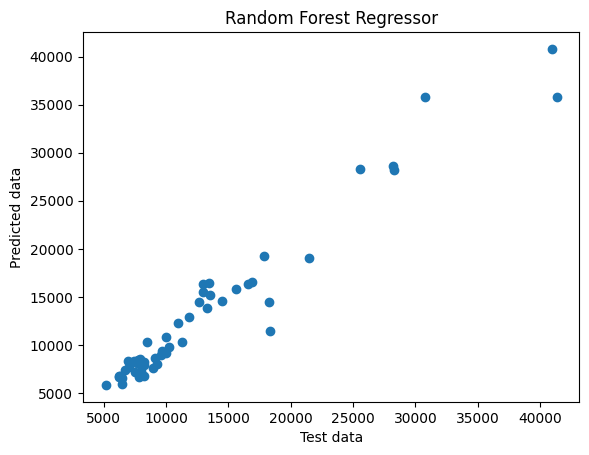

In [228]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred1)
plt.title("Random Forest Regressor")
plt.xlabel("Test data")
plt.ylabel("Predicted data")
plt.show()

In [229]:
Y_pred1=m1.predict(x1)
Y_pred1=Y_pred1.round(-1)
Y_pred1

array([14890., 14770., 14400., 13730., 15580., 15400., 18460., 18350.,
       21380., 18920., 14890., 14920., 18470., 16730., 18120., 34500.,
       34480., 34830.,  6300.,  6700.])